In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from hierarchical_content_taxonomy.hierarchical_taxonomy import HierarchicalTaxonomy
import pandas as pd

In [4]:
urls = ['https://minimalistbaker.com/']

/Users/msheridan/Documents/projects/content-taxonomy/.venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Fetched 100 posts from page 2
Fetched 100 posts from page 3
Fetched 100 posts from page 4
Fetched 100 posts from page 5
Fetched 100 posts from page 6
Fetched 100 posts from page 7
Fetched 100 posts from page 8
Fetched 100 posts from page 9
                                                text  \
0  Simple methods and BIG flavor collide in this ...   
1  Hold onto your sprinkles, folks! This recipe t...   
2  Let your tastebuds transport you to a tropical...   
3  Whether you’re a gardener, farmers market goer...   
4  Why choose between spicy, savory, and sweet wh...   

                                               title  \
0     Lemony Quinoa Kale Salad with Crispy Chickpeas   
1            Gluten-Free Funfetti Cupcakes (1 Bowl!)   
2                  No-Bake Coconut Lime Energy Bites   
3  Zucchini Pesto Pasta with Roasted Tomatoes & C...   
4                 Jerk Tofu & Roasted Plantain Bowls   

                                                 url                 date  \
0  https:

/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/cluster_creation.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.docs_df['title_plus_text'] = self.docs_df['title'] + '. ' + self.docs_df['text']
/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/cluster_creation.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.docs_df['text_embedding'] = self.embeddings.tolist()


creating linkage vectors
creating dendrogram


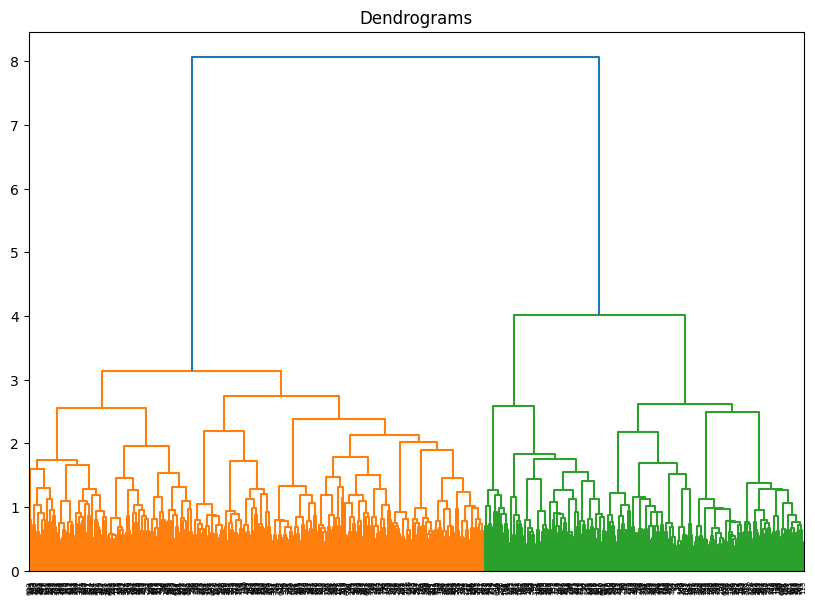

finding optimal clusters


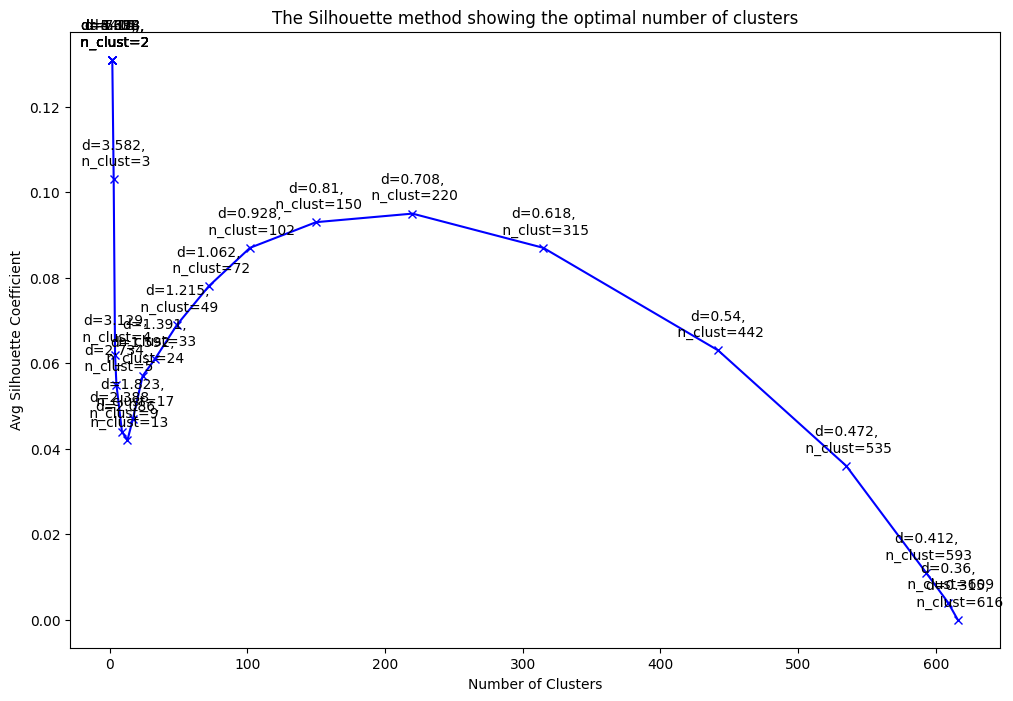

In [2]:
print(f"pulling data for {urls}")
taxonomy = HierarchicalTaxonomy(urls)
taxonomy.pull_data()
data = taxonomy.get_data()
print(f"fetched {len(data)} posts")
taxonomy.save_data('minimalist_baker.csv')
data = pd.read_csv('minimalist_baker.csv')
taxonomy.data = data[:2000] ##only looking at the first 2000 rows for example purposes
print('creating cluster diagnostic plots')
taxonomy.generate_cluster_plots()

In [4]:
print('creating clusters')
# set distances based on silhouette analysis and desired number of levels and clusters
taxonomy.create_clusters([3.0, 1.26])
data = taxonomy.get_data()
data.to_csv('minimalist_baker_clustered.csv', index=False)

creating clusters


In [ ]:
from hierarchical_content_taxonomy.taxonomy_creation.tag_naming.simple import SimpleTagNamer

taxonomy = HierarchicalTaxonomy(urls, tag_namer=SimpleTagNamer)
taxonomy.data = data
taxonomy.num_levels = 2
print('Naming clusters...')
taxonomy.name_clusters()
data = taxonomy.get_data()

/Users/msheridan/Documents/projects/content-taxonomy/.venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


/Users/msheridan/Documents/projects/content-taxonomy/.venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Naming clusters...


In [2]:
taxonomy.review_taxonomy()

url_count
topic_level_1_cluster_id topic_level_2_cluster_id topic_level_1        topic_level_2                        
1                        1                        vegan                eggs_perfect                        3
                         2                        vegan                free_vegan                         11
                         3                        vegan                free_savory                         9
                         4                        vegan                potato_sweet                       14
                         5                        vegan                roasted_chickpeas                  12
                         6                        vegan                roasted_perfect                    14
                         7                        vegan                pasta_vegan                        14
                         8                        vegan                squash_butternut                    5
                         9                        vegan                free_vegan_zucchini                15
                         10                       vegan                vegan_cheese                       13
                         11                       vegan                vegan_breakfast                    10
                         12                       vegan                vegan_pizza                        11
2                        13                       pot                  salad_kale                         25
                         14                       pot                  sauce_homemade                     14
                         15                       pot                  salad_cucumber                     13
                         16                       pot                  mango_salsa                        11
                         17                       pot                  soup_pot                           17
                         18                       pot                  soup_pot_instant                   19
                         19                       pot                  curry_green                        14
                         20                       pot                  rice_instant                        5
                         21                       pot                  guide_oil                           2
                         22                       pot                  vegan_risotto                      22
                         23                       pot                  chicken_baked                       6
                         24                       pot                  salmon_inspired                    10
                         25                       pot                  tofu_crispy                        16
                         26                       pot                  vegan_tacos                        18
                         27                       pot                  creamy_white                       16
                         28                       pot                  chili_pot                          24
3                        29                       vegan_fruit_mocktail tea_fresh                           6
                         30                       vegan_fruit_mocktail fruit_mocktail                     14
                         31                       vegan_fruit_mocktail chocolate_hot                      11
                         32                       vegan_fruit_mocktail vegan_creamy                       10
                         33                       vegan_fruit_mocktail smoothie_protein                   10
                         34                       vegan_fruit_mocktail vegan_chia                         15
                         35                       vegan_fruit_mocktail sorbet_churn                        9
                         36                       vegan_fruit_mock

In [15]:
taxonomy.view_titles_in_cluster(1, 4).head(10)

Titles for level 1, cluster ID 4 (gluten-free_desserts):


0              Gluten-Free Funfetti Cupcakes (1 Bowl!)
1                    No-Bake Coconut Lime Energy Bites
2    No-Bake Vegan Chocolate Cheesecake Cups (5 Min...
3         Gluten-Free Lemon Poppy Seed Muffins (Vegan)
4    Chocolate Pot de Crème (with a Secret Ingredie...
5    1-Bowl Banana Chocolate Pecan Muffins (Vegan +...
6    Chocolate Tahini Caramels (No Candy Thermometer!)
7      Chocolate Pecan Shortbread Cookies (Vegan + GF)
8          1-Bowl Cranberry Orange Scones (Vegan + GF)
9                 Easy Gluten-Free Cornbread (1 Bowl!)
Name: title, dtype: object

In [ ]:
from hierarchical_content_taxonomy.taxonomy_creation.tag_naming.tfidf import TfidfTagNamer

taxonomy = HierarchicalTaxonomy(urls, tag_namer=TfidfTagNamer)
taxonomy.data = data
taxonomy.num_levels = 2
print('Naming clusters...')
taxonomy.name_clusters()
data = taxonomy.get_data()

Naming clusters...


In [4]:
taxonomy.review_taxonomy()

url_count
topic_level_1_cluster_id topic_level_2_cluster_id topic_level_1               topic_level_2                                 
1                        1                        pesto_roasted_free_vegan    time_perfect_make_free                       3
                         2                        pesto_roasted_free_vegan    free_gluten_vegan_bake                      11
                         3                        pesto_roasted_free_vegan    free_oil_crispy_rice                         9
                         4                        pesto_roasted_free_vegan    potato_sweet_roasted_quinoa                 14
                         5                        pesto_roasted_free_vegan    chickpeas_roasted_ingredients_chili         12
                         6                        pesto_roasted_free_vegan    roasted_perfect_cabbage_quick               14
                         7                        pesto_roasted_free_vegan    pasta_vegan_creamy_pesto                    14
                         8                        pesto_roasted_free_vegan    squash_butternut_garlic_instant              5
                         9                        pesto_roasted_free_vegan    pasta_free_pesto_easy                       15
                         10                       pesto_roasted_free_vegan    cheese_vegan_easy_salad                     13
                         11                       pesto_roasted_free_vegan    vegan_bowl_minutes_quick                    10
                         12                       pesto_roasted_free_vegan    avocado_homemade_pesto_best                 11
2                        13                       bean_pot_inspired_instant   salad_kale_quinoa_dressing                  25
                         14                       bean_pot_inspired_instant   sauce_minute_homemade_tahini                14
                         15                       bean_pot_inspired_instant   cucumber_salad_quick_inspired               13
                         16                       bean_pot_inspired_instant   mango_avocado_easy_creamy                   11
                         17                       bean_pot_inspired_instant   soup_white_pot_bean                         17
                         18                       bean_pot_inspired_instant   soup_pot_instant_friendly                   19
                         19                       bean_pot_inspired_instant   curry_green_salmon_sweet                    14
                         20                       bean_pot_inspired_instant   rice_instant_pot_perfect                     5
                         21                       bean_pot_inspired_instant   oil_instant_pot_free                         2
                         22                       bean_pot_inspired_instant   vegan_cauliflower_rice_pan                  22
                         23                       bean_pot_inspired_instant   chicken_baked_inspired_quick                 6
                         24                       bean_pot_inspired_instant   salmon_bowls_inspired_30                    10
                         25                       bean_pot_inspired_instant   tofu_crispy_baked_sesame                    16
                         26                       bean_pot_inspired_instant   vegan_bean_smoky_green                      18
                         27                       bean_pot_inspired_instant   white_bean_dressing_creamy                  16
                         28                       bean_pot_inspired_instant   chili_bean_bowls_beans                      24
3                        29                       cream_hot_apple_ginger      hot_ginger_apple_sugar                       6
                         30                       cream_hot_apple_ginger      strawberry_ginger_easy_cucumber             14
                         31                       cream_hot_apple_ginger      hot_chocolate_chai_spiced            

In [ ]:
from hierarchical_content_taxonomy.taxonomy_creation.tag_naming.wiki_matching import WikiMatchingTagNamer

taxonomy = HierarchicalTaxonomy(urls, tag_namer=WikiMatchingTagNamer)
taxonomy.data = data
taxonomy.num_levels = 2
print('Naming clusters...')
taxonomy.name_clusters()
data = taxonomy.get_data()

/Users/msheridan/Documents/projects/content-taxonomy/.venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Naming clusters...
Wikipedia API test successful. Found 10 results for 'cats'


In [2]:
taxonomy.review_taxonomy()

url_count
topic_level_1_cluster_id topic_level_2_cluster_id topic_level_1                     topic_level_2                                  
1                        1                        veganism_pasta                    time                                          3
                         2                        veganism_pasta                    veganism_dairy                               11
                         3                        veganism_pasta                    oil_crispiness_rice                           9
                         4                        veganism_pasta                    potato_sweetness_crispiness                  14
                         5                        veganism_pasta                    ingredient_chili_time                        12
                         6                        veganism_pasta                    cabbage_green                                14
                         7                        veganism_pasta                    pasta_veganism_creamy_pesto                  14
                         8                        veganism_pasta                    butternut_garlic_instant                      5
                         9                        veganism_pasta                    pasta_pesto_veganism                         15
                         10                       veganism_pasta                    cheese_veganism_salad                        13
                         11                       veganism_pasta                    veganism_bowl_minutes_bowls                  10
                         12                       veganism_pasta                    pesto                                        11
2                        13                       veganism_soup_salad_pot           salad_kale                                   25
                         14                       veganism_soup_salad_pot           minute                                       14
                         15                       veganism_soup_salad_pot           cucumber_salad_inspiration_cabbage           13
                         16                       veganism_soup_salad_pot           mango_creamy_veganism                        11
                         17                       veganism_soup_salad_pot           soup_pot_bean_creamy                         17
                         18                       veganism_soup_salad_pot           soup_pot_instant_chicken                     19
                         19                       veganism_soup_salad_pot           curry_green_salmon_sweetness                 14
                         20                       veganism_soup_salad_pot           rice_instant_pot                              5
                         21                       veganism_soup_salad_pot           oil_instant_pot                               2
                         22                       veganism_soup_salad_pot           veganism_rice_crispiness                     22
                         23                       veganism_soup_salad_pot           chicken_inspiration_pesto                     6
                         24                       veganism_soup_salad_pot           salmon_bowls_inspiration_salad               10
                         25                       veganism_soup_salad_pot           tofu_crispiness_sesame                       16
                         26                       veganism_soup_salad_pot           veganism_bean_green                          18
                         27                       veganism_soup_salad_pot           bean_creamy_pesto                            16
                         28                       veganism_soup_salad_pot           chili_bean_bowls_bean                        24
3                        29                       veganism_chocolate_smoothie_cream ginger_apple_sugar_minute                     6
                         30   

In [6]:
taxonomy.view_titles_in_cluster(2, 3).head(10)

Titles for level 2, cluster ID 3 (oil_crispiness_rice):


0                Cassava Flour Tortillas (Grain-Free)
1                     Crispy Vegan Gluten-Free Latkes
2                              Vegan “Fish” and Chips
3         Savory Teff Crepes with Miso Squash Filling
4    Savory Chickpea Pancakes with Leek and Mushrooms
5                Crispy Cajun Baked Fries (Oil-Free!)
6                                   Easy Beet Falafel
7    How to Make Tortillas (2 Ingredients, Oil-Free!)
8       Savory Moong Dal Rice Crepes (Dosa or Cheela)
Name: title, dtype: object

In [ ]:
# Test the updated API-based GenerativeTagNamer
# Note: You'll need to set your OpenAI API key as an environment variable: 
# export OPENAI_API_KEY="your-api-key-here"
import os
from hierarchical_content_taxonomy.taxonomy_creation.tag_naming.generative import GenerativeTagNamer

os.environ["OPENAI_API_KEY"] = None 
# Check if API key is set
if os.getenv('OPENAI_API_KEY'):
    print("API key found")
    taxonomy = HierarchicalTaxonomy(urls, tag_namer=GenerativeTagNamer)
    taxonomy.data = data
    taxonomy.num_levels = 2
    
    print('Naming clusters with API-based generation...')
    taxonomy.name_clusters()
    data = taxonomy.get_data()

/Users/msheridan/Documents/projects/content-taxonomy/.venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


✓ API key found
Naming clusters with API-based generation...
✓ API endpoint configured: gpt-3.5-turbo


/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/tag_naming/generative.py:133: UserWarning: Generated tag vegan_cooking already exists in previous tags. Regenerating with higher temperature.
  warnings.warn(warning_string)
/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/tag_naming/generative.py:133: UserWarning: Generated tag vegan_recipes already exists in previous tags. Regenerating with higher temperature.
  warnings.warn(warning_string)
/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/tag_naming/generative.py:133: UserWarning: Generated tag vegan_recipes already exists in previous tags. Regenerating with higher temperature.
  warnings.warn(warning_string)
/Users/msheridan/Documents/projects/content-taxonomy/hierarchical_content_taxonomy/taxonomy_creation/tag_naming/generative.py:133: UserWarning: Generated tag soup_recipes alre

✓ Successfully generated tags using API


In [4]:
taxonomy.review_taxonomy()

url_count
topic_level_1_cluster_id topic_level_2_cluster_id topic_level_1               topic_level_2                         
1                        1                        plant-based_cuisine_recipes egg_recipes                          3
                         2                        plant-based_cuisine_recipes vegan_gluten-free_recipes           11
                         3                        plant-based_cuisine_recipes vegan_cooking                        9
                         4                        plant-based_cuisine_recipes vegetarian_recipes                  14
                         5                        plant-based_cuisine_recipes plant-based_cooking                 12
                         6                        plant-based_cuisine_recipes roasted_vegetables                  14
                         7                        plant-based_cuisine_recipes vegan_pasta_recipes                 14
                         8                        plant-based_cuisine_recipes squash_recipes                       5
                         9                        plant-based_cuisine_recipes vegan_recipes                       15
                         10                       plant-based_cuisine_recipes vegan_meals                         13
                         11                       plant-based_cuisine_recipes vegan_breakfast_recipes             10
                         12                       plant-based_cuisine_recipes plant-based_recipes                 11
2                        13                       cooking_recipes             salads                              25
                         14                       cooking_recipes             sauces                              14
                         15                       cooking_recipes             salad_recipes                       13
                         16                       cooking_recipes             vegan_mango_recipes                 11
                         17                       cooking_recipes             soup_recipes                        17
                         18                       cooking_recipes             soup_varieties                      19
                         19                       cooking_recipes             cooking_curry_seasonings            14
                         20                       cooking_recipes             rice_recipes                         5
                         21                       cooking_recipes             cooking_techniques                   2
                         22                       cooking_recipes             vegetarian_recipe                   22
                         23                       cooking_recipes             chicken_recipes                      6
                         24                       cooking_recipes             seafood_recipes                     10
                         25                       cooking_recipes             tofu_recipes                        16
                         26                       cooking_recipes             vegan_mexican_recipe                18
                         27                       cooking_recipes             plant-based_dips_and_sauces         16
                         28                       cooking_recipes             plant-based_meals                   24
3                        29                       vegan_beverages             beverage_recipes                     6
                         30                       vegan_beverages             mocktail_recipes                    14
                         31                       vegan_beverages             hot_drinks                          11
                         32                       vegan_beverages             vegan_dessert_recipes               10
                         33                       vegan_beverages             smoothie_recipes                    10
            

In [5]:
taxonomy.view_titles_in_cluster(2, 35)

Titles for level 2, cluster ID 35 (frozen_desserts):


0                      Easy Apricot Sorbet (No-Churn!)
1                   Rainbow Sherbet (Vegan, No-Churn!)
2    The Ultimate Gluten-Free Banana Bread (Bakery ...
3          5-Minute Pineapple Sorbet (Dole Whip Dupe!)
4                3-Ingredient Mango Sorbet (No-Churn!)
5    Banana Bread Steel Cut Oats (Instant Pot Frien...
6             Strawberry Watermelon Sorbet (5 Minutes)
7                          Coffee Chocolate Nice Cream
8           Easy Banana Ice Cream (Tips + 10 Flavors!)
Name: title, dtype: object